In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


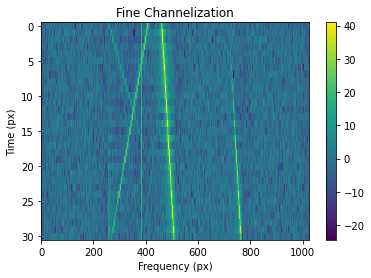

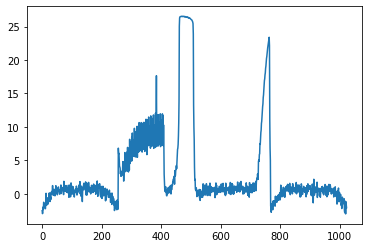

In [5]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)

digitize_stream = stg.voltage.sigproc.quantize_real(stream.y,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(digitize_stream,
                                                    M,
                                                    P)

# Perform quantization
n_bits = 4
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

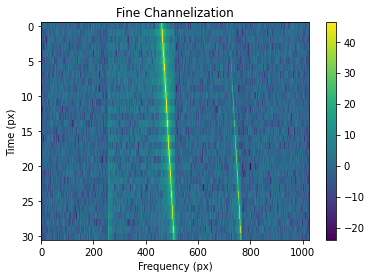

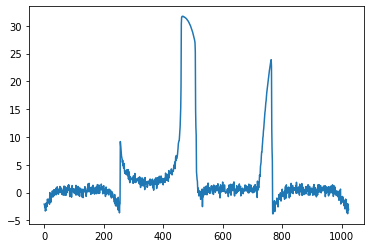

In [15]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=50000000*u.Hz/u.s, 
                  level=1)

# digitize_stream = stg.voltage.sigproc.quantize_real(stream.y,
#                                                     target_fwhm=30,
#                                                     n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)

# Perform quantization
# n_bits = 8
# target_fwhm = 30 * 2**n_bits / 2**8 
# q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
#                                                       target_fwhm=target_fwhm,
#                                                       n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()